In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
dataset = r'K:\vsprojenvi1\Dataset'

In [4]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# DATA AUGMENTATION

import os
import cv2
import numpy as np
from tf_keras.preprocessing.image import ImageDataGenerator
from tf_keras.utils import img_to_array, array_to_img, load_img

# Define dataset paths
original_dataset_path = r'K:\vsprojenvi1\Dataset\Celebs'
augmented_dataset_path = r'K:\vsprojenvi1\Dataset\aug_celebs'

# Create augmented dataset folder if not exists
os.makedirs(augmented_dataset_path, exist_ok=True)

# Define ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=30,        # Rotate images up to 30 degrees
    width_shift_range=0.2,    # Shift width by 20%
    height_shift_range=0.2,   # Shift height by 20%
    shear_range=0.15,         # Shear transformation
    zoom_range=0.2,           # Zoom in/out by 20%
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill empty areas after transformation
)

# Loop through each celebrity folder
for celeb_name in os.listdir(original_dataset_path):
    celeb_folder = os.path.join(original_dataset_path, celeb_name)
    save_folder = os.path.join(augmented_dataset_path, celeb_name)

    # Create folder for each celebrity in augmented dataset
    os.makedirs(save_folder, exist_ok=True)

    # Loop through images
    for img_name in os.listdir(celeb_folder):
        img_path = os.path.join(celeb_folder, img_name)

        try:
            # Load image
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Generate augmented images
            aug_iter = datagen.flow(img_array, batch_size=1)

            # Save 5 augmented images per original image
            for i in range(5):  
                aug_img = next(aug_iter)[0].astype(np.uint8)
                aug_img_pil = array_to_img(aug_img)
                
                # Save the augmented image
                aug_img_name = f"{img_name.split('.')[0]}_aug{i}.jpg"
                aug_img_pil.save(os.path.join(save_folder, aug_img_name))

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

print("✅ Augmented images saved successfully!")



✅ Augmented images saved successfully!


In [ ]:
# COMBINING THE IMAGES

import random
import shutil

os.makedirs(r'K:\vsprojenvi1\Dataset\celebs_combined', exist_ok=True)

ron_dir = r'K:\vsprojenvi1\Dataset\aug_celebs\Ronaldo'
vir_dir = r'K:\vsprojenvi1\Dataset\aug_celebs\Virat'
ste_dir = r'K:\vsprojenvi1\Dataset\aug_celebs\Steph'
lew_dir = r'K:\vsprojenvi1\Dataset\aug_celebs\Lewis'
train_dir = r'K:\vsprojenvi1\Dataset\celebs_combined'

def copy_files(source, destination):
    for file_name in os.listdir(source):
        file_path = os.path.join(source, file_name)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(destination, file_name))

# Copy files instead of moving
copy_files(ron_dir, train_dir)
copy_files(vir_dir, train_dir)
copy_files(ste_dir, train_dir)
copy_files(lew_dir, train_dir)

print("All images copied to train directory.")


All images copied to train directory.


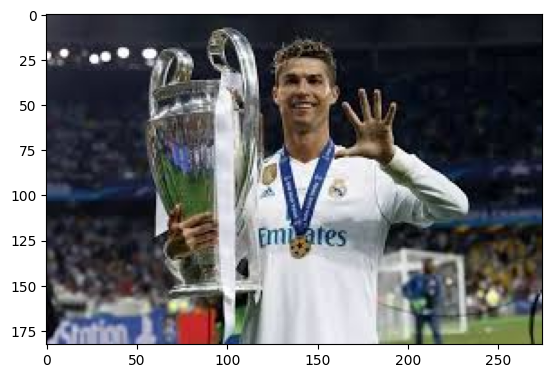

In [7]:
img1 = mpimg.imread(r'K:\vsprojenvi1\Dataset\Celebs\Ronaldo\Ronaldo2.jpg')
plt.imshow(img1)
plt.show()

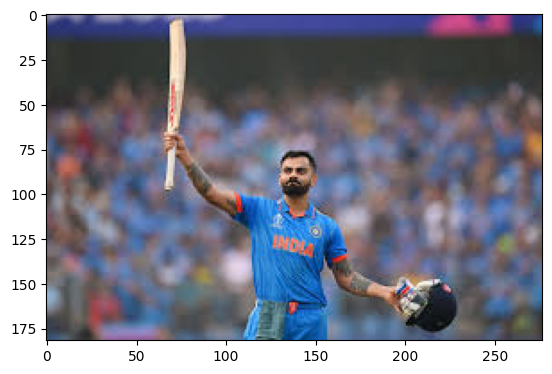

In [8]:
img2 = mpimg.imread(r'K:\vsprojenvi1\Dataset\Celebs\Virat\Virat_kohli1.jpg')

plt.imshow(img2)
plt.show()

In [9]:
print(img1.shape)
print(img2.shape)

(183, 275, 3)
(182, 277, 3)


In [10]:
import os
import random

In [ ]:
# RESIZING THE IMAGES

original_folder = r'K:\vsprojenvi1\Dataset\celebs_combined\\'
resized_folder = r'K:\vsprojenvi1\Dataset\resized_celebs\\'

os.makedirs(r'K:\vsprojenvi1\Dataset\resized_celebs', exist_ok=True)

file_list = os.listdir(original_folder)
random.shuffle(file_list)

for i in range(len(original_folder)):
    filename = file_list[i]
    img_path = original_folder + filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_img_path = resized_folder + filename
    img.save(new_img_path)

In [24]:
path, dirs, files = next(os.walk(r'K:\vsprojenvi1\Dataset\resized_celebs'))
files_count = len(files)

print(files_count)

195


In [ ]:
# ENCODING THE LABELS

file_name = os.listdir(r'K:\vsprojenvi1\Dataset\resized_celebs')

virat_count = 0
ronaldo_count = 0
lewis_count = 0
steph_count = 0

for name in file_name:

    if name[0:3] == 'Vir':
        virat_count += 1

    elif name[0:3] == 'Ron':
        ronaldo_count += 1

    elif name[0:3] == 'Lew':
        lewis_count += 1

    else:
        steph_count += 1

print("Count of Virat:", virat_count)
print("Count of Ronaldo:", ronaldo_count)
print("Count of Lewis:", lewis_count)
print("Count of Steph:", steph_count)

Count of Virat: 50
Count of Ronaldo: 50
Count of Lewis: 45
Count of Steph: 50


In [ ]:
# APPENDING THE VALUES

labels = []

for i in range(195):

    name1 = file_name[i]
    label = name1[0:3]

    if label == 'Vir':
        labels.append(0)

    elif label == 'Lew':
        labels.append(2)

    elif label == 'Ste':
        labels.append(3)

    else:
        labels.append(1)

In [36]:
values, count = np.unique(labels, return_counts=True)

print(values)
print(count)
print(len(labels))

[0 1 2 3]
[50 50 45 50]
195


In [ ]:
# KEEPING ONLY IMAGES IN DATASET

import glob
import cv2

img_directory = r'K:\vsprojenvi1\Dataset\resized_celebs\\'
img_ext = ['png', 'jpg']

files = []

for ext in img_ext:

    files.extend(glob.glob(img_directory + f'*.{ext}'))

print("Total_images : ", len(files))

celeb_imgs = np.asarray([cv2.imread(file) for file in files])

Total_images :  195


In [38]:
print(celeb_imgs)

[[[[  8   6   6]
   [  8   6   6]
   [  8   6   6]
   ...
   [  0   0   0]
   [  4   4   4]
   [  0   0   0]]

  [[  8   6   6]
   [  8   6   6]
   [  8   6   6]
   ...
   [  0   0   0]
   [  4   4   4]
   [  0   0   0]]

  [[  8   6   6]
   [  8   6   6]
   [  8   6   6]
   ...
   [  0   0   0]
   [  4   4   4]
   [  0   0   0]]

  ...

  [[172 160 160]
   [172 160 160]
   [172 160 160]
   ...
   [137 132 133]
   [137 131 132]
   [135 129 130]]

  [[173 161 161]
   [173 161 161]
   [173 161 161]
   ...
   [148 143 144]
   [148 142 143]
   [145 139 140]]

  [[170 158 158]
   [171 159 159]
   [172 160 160]
   ...
   [154 149 150]
   [154 148 149]
   [150 144 145]]]


 [[[  2   4   4]
   [  2   4   4]
   [  2   4   4]
   ...
   [  5   5   5]
   [  5   5   5]
   [  6   6   6]]

  [[  2   4   4]
   [  2   4   4]
   [  2   4   4]
   ...
   [  5   5   5]
   [  5   5   5]
   [  6   6   6]]

  [[  2   4   4]
   [  2   4   4]
   [  2   4   4]
   ...
   [  5   5   5]
   [  5   5   5]
   [  6   6

In [39]:
X = celeb_imgs
y = np.asarray(labels)

In [40]:
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# SPLITTING THE DATA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# STANDARDIZING

X_train_std = X_train/255
X_test_std = X_test/255

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# IMPORTING PRETRAINED MODEL

mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)

In [ ]:
# TRAINING A NEURAL NETWORK

import tf_keras

model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# COMPILING

model.compile(
    optimizer='adam',
    loss = tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [55]:
model.fit(X_train_std, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 5s 443ms/step - loss: 1.7920 - acc: 0.2500
Epoch 2/10
5/5 [==============================] - 2s 438ms/step - loss: 1.3431 - acc: 0.4167
Epoch 3/10
5/5 [==============================] - 2s 423ms/step - loss: 1.0344 - acc: 0.5705
Epoch 4/10
5/5 [==============================] - 2s 402ms/step - loss: 0.7667 - acc: 0.7628
Epoch 5/10
5/5 [==============================] - 2s 404ms/step - loss: 0.6098 - acc: 0.8526
Epoch 6/10
5/5 [==============================] - 2s 405ms/step - loss: 0.4893 - acc: 0.8974
Epoch 7/10
5/5 [==============================] - 2s 400ms/step - loss: 0.3767 - acc: 0.9551
Epoch 8/10
5/5 [==============================] - 2s 432ms/step - loss: 0.3157 - acc: 0.9679
Epoch 9/10
5/5 [==============================] - 2s 420ms/step - loss: 0.2639 - acc: 0.9744
Epoch 10/10
5/5 [==============================] - 2s 420ms/step - loss: 0.2223 - acc: 0.9872


In [56]:
score, acc = model.evaluate(X_test_std, y_test)

print(score)
print(acc)

2/2 [==============================] - 1s 112ms/step - loss: 0.3364 - acc: 0.9231
0.3363538980484009
0.9230769276618958


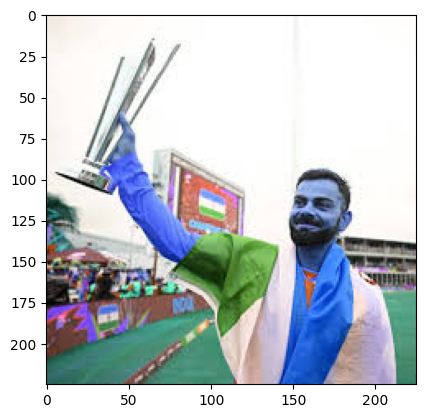

1/1 [==============================] - 0s 23ms/step
The image represents Virat Kohli


In [ ]:
# PREDICTIVE MODEL

input_img_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_img_path)

#cv2_imshow(input_image)
plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 224, 224,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label==1:
    print("The image represents Ronaldo")

elif input_pred_label==2:
    print("The image represents Lewis Hamilton")

elif input_pred_label==3:
    print("The image represents Steph Curry")

else:
    print("The image represents Virat Kohli")